## Codes for obtaining $L_{max}$ using BIOSCREEN-ATS ##

The codes below solves the steady-state solution of the BIOSCREEN-AT solution provided in Karanovic et al. (2007). The derivation of the solution is provided in the main manuscript.

$$
C(x,y,z) = \frac{1}{2 HW}\int\limits_{-W/2}^{W/2}\int\limits_{-H}^{H}C_{ps}(x,y-y',z-z')\text{d}z'\text{d}y'
$$

$$
C_{ps}(x,y,z) = C_0\frac{2HW}{2\pi\sqrt{D_x D_y D_z}}\bigg(\lambda_{EEF} + \frac{v^2}{4D_x}\bigg)^\frac{3}{2}\frac{x}{r^2}\bigg(1+\frac{1}{r}\bigg)e^{\frac{vx}{2D_x}-r}
$$

$$
r= r(x,y,z) = \sqrt{\bigg(\lambda_{EEF} + \frac{v^2}{4D_x}\bigg)\bigg(\frac{x^2}{D_x} + \frac{y^2}{D_y} + \frac{z^2}{D_z}\bigg)}
$$

For soliving $L_{max}$ a threshold concentration ($C_{thres}$) is used.  $C_{thres}$ can be any concentration such as water quality standard limit or detection limit. Then $L_{max}$ is the largest distance between the source and the point where  $C_{thres}$ appears along the flow direction.

Numerical integration is required for obtaining the solution.

**Python** programming codes are used for the solution. The codes are provided below.

First, the used Python libraries. Only the following three Python libraries are required.

In [9]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

**Model inputs**

Pls. see the manuscript for details.

In [10]:
W = 10 # m, source width
H = 2 # m, source thickness
C_0 = 50 # mg/L, source concentration
v = 20 # m/yr, velocity
alpha_L = 10 # m, long. dispersivity
alpha_Th = 1 # m, trans. hor. disp.
alpha_Tv = 0.1 # m, trans. ver. disp
D = 0 # diff coeff.
D_x = v*alpha_L+D
D_y = v*alpha_Th+D
D_z = v*alpha_Tv+D
lambda_eff= 0.5 # 1/yr degradation constant.
Cthres = 5e-5 # mg/L, selected threshold concentration

The main code. Pls. note the equation above is modified to provide only the solution for $L_{max}$. 

In the following cell, the solution provided above is functionalized. Double integral in the solution in returned in the last line of the code.

In [11]:
def C(x,y,z):
        
    def C_ps(y,z):
        
        r = np.sqrt((lambda_eff+v**2/(4*D_x))*(x**2/D_x+y**2/D_y+z**2/D_z))
        return C_0*(2*H*W)/(2*np.pi*np.sqrt(D_x*D_y*D_z))*(lambda_eff+v**2/(4*D_x))**(3/2)*x/r**2*(1+(1/r))*np.exp((v*x)/(2*D_x)-r)
    
    def C_ps2(y2,z2):
        
        return C_ps(y-y2,z-z2)
    
    return 1/(2*H*W)*sp.integrate.dblquad(C_ps2,-W/2,W/2,-H,H)[0]

In the following cell the functions developed above is implemented. Note that $x<100000$ is used. This can be changed to larger numbers if required. In that case the simulation time maybe longer. 

Also, note that `C(x,0,0)` is used for obtaining the centerline concentration which has to be less than $C_{thres}$

In [12]:
x_array = np.array([0])
c_array = np.array([C(1,0,0)])
x = 1
while C(x,0,0) >= Cthres and x<100000:
    x = x+1
    x_array = np.append(x_array,x)
    c_array = np.append(c_array,C(x,0,0))
else:
    print('Lmax=',x, 'C =',C(x,0,0))

Lmax= 495 C = 4.9046433346674535e-05


Finally, we visualize the concentration along the centreline. 

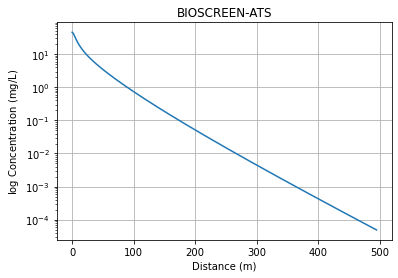

In [20]:
plt.axes(yscale='log')
plt.plot(x_array,c_array)
plt.title('BIOSCREEN-ATS',loc='center')
plt.xlabel('Distance (m)'); plt.ylabel(r'$\log$ Concentration (mg/L)') 
plt.grid()
plt.savefig('BIOSCREEN-ATS')